In [1]:
# Step 1: Import relevant libraries and dataset into python environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('lagos,Nigeria 2022-04-15 to 2024-12-31.csv')
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"lagos,Nigeria",2022-04-15,32.0,25.8,28.9,40.6,25.8,33.7,24.9,79.6,...,23.7,10.0,60.0,2022-04-15T06:38:38,2022-04-15T18:54:28,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"65210099999,VRJU8,DNMM,remote,65201099999"
1,"lagos,Nigeria",2022-04-16,33.2,26.0,28.3,40.8,26.0,32.4,24.4,80.1,...,14.5,6.0,60.0,2022-04-16T06:38:14,2022-04-16T18:54:24,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"VRJU8,DNMM,remote,65201099999"
2,"lagos,Nigeria",2022-04-17,33.2,25.0,28.9,43.8,25.0,34.4,25.7,83.4,...,24.6,10.0,60.0,2022-04-17T06:37:50,2022-04-17T18:54:20,0.52,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"65210099999,DNMM,65201099999"
3,"lagos,Nigeria",2022-04-18,29.1,23.0,25.7,33.6,23.0,27.0,23.1,86.3,...,9.6,6.0,10.0,2022-04-18T06:37:26,2022-04-18T18:54:16,0.56,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"65210099999,DNMM,remote,65201099999"
4,"lagos,Nigeria",2022-04-19,32.0,25.0,28.1,39.2,25.0,31.6,24.5,81.6,...,13.2,8.0,30.0,2022-04-19T06:37:03,2022-04-19T18:54:13,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"65210099999,DNMM,remote,65201099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,"lagos,Nigeria",2024-12-27,33.1,24.2,27.9,0.0,0.0,37.9,22.0,73.5,...,NaN,NaN,NaN,2024-12-27T06:55:18,2024-12-27T18:40:17,0.89,Partially cloudy,NaN,partly-cloudy-day,NaN
988,"lagos,Nigeria",2024-12-28,32.9,23.6,27.7,0.0,0.0,37.4,22.5,75.4,...,NaN,NaN,NaN,2024-12-28T06:55:46,2024-12-28T18:40:48,0.92,Partially cloudy,NaN,partly-cloudy-day,NaN
989,"lagos,Nigeria",2024-12-29,33.3,24.1,27.9,0.0,0.0,37.9,23.0,77.2,...,NaN,NaN,NaN,2024-12-29T06:56:13,2024-12-29T18:41:18,0.95,Partially cloudy,NaN,partly-cloudy-day,NaN
990,"lagos,Nigeria",2024-12-30,33.0,24.0,28.0,0.0,0.0,38.3,23.1,76.9,...,NaN,NaN,NaN,2024-12-30T06:56:40,2024-12-30T18:41:49,0.00,Partially cloudy,NaN,partly-cloudy-day,NaN


In [2]:
# Find null values
df.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          362
snow                161
snowdepth           181
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation      161
solarenergy         161
uvindex             161
severerisk          161
sunrise               0
sunset                0
moonphase             0
conditions            0
description         161
icon                  0
stations            175
dtype: int64

In [3]:
# Find duplicates
df.duplicated().sum()

0

In [4]:
# Fill missing values
df.fillna(0, inplace=True)

In [5]:
#Drop name column
df.drop(['name'], axis=1, inplace=True)
#rename datetime to DATE
df.rename(columns={'datetime': 'Date'}, inplace=True)
#Rename precip to Precipitation
df.rename(columns={'precip': 'Precipitation'}, inplace=True)
#set date to index
df.set_index('Date', inplace=True)

In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
monthly_df = df['Precipitation'].resample('M').mean()

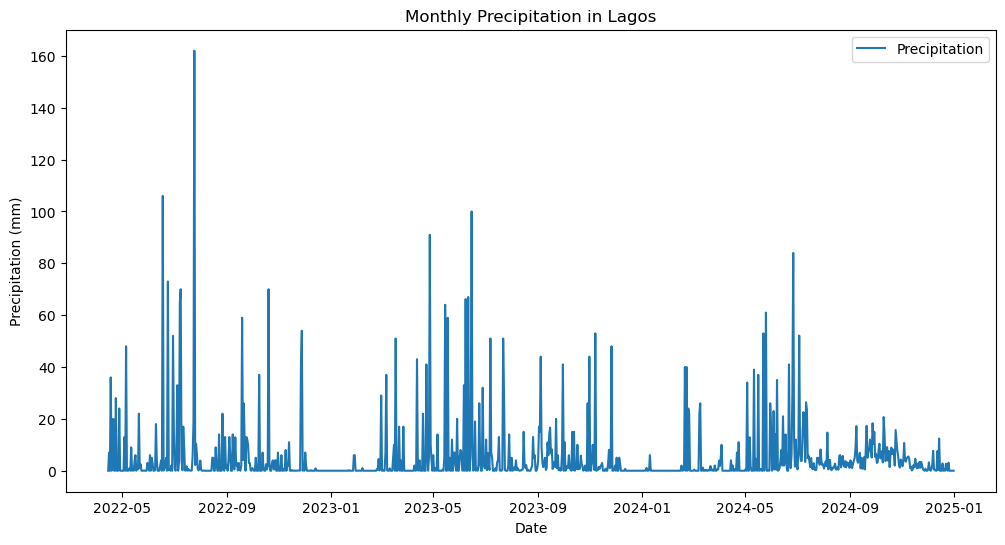

In [8]:
# Step 2: Exploratory Data Analysis (EDA)
# Plot precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Monthly Precipitation in Lagos')
plt.legend()
plt.show()


In [9]:
np.random.seed(42)  # for reproducibility
df['Flood_Level'] = np.random.randint(0,101, size=len(df))

In [10]:
#Arima model
from statsmodels.tsa.arima.model import ARIMA

In [11]:
# Step 3: Train ARIMA Model
order = (1, 1, 1)  # Example values, should be fine-tuned based on your data
seasonal_order = (1, 1, 1, 12)  # Example seasonal values model

In [12]:
model = ARIMA(monthly_df, order=order, seasonal_order=seasonal_order) 

In [13]:
# Step 4: Fit ARIMA Model
arima_result = model.fit()

/Users/sokariprincess/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [14]:
# Step 5: Forecast Future Values
forecast_steps = 12  # Forecast for the next year (12 months)
forecast = arima_result.get_forecast(steps=forecast_steps)

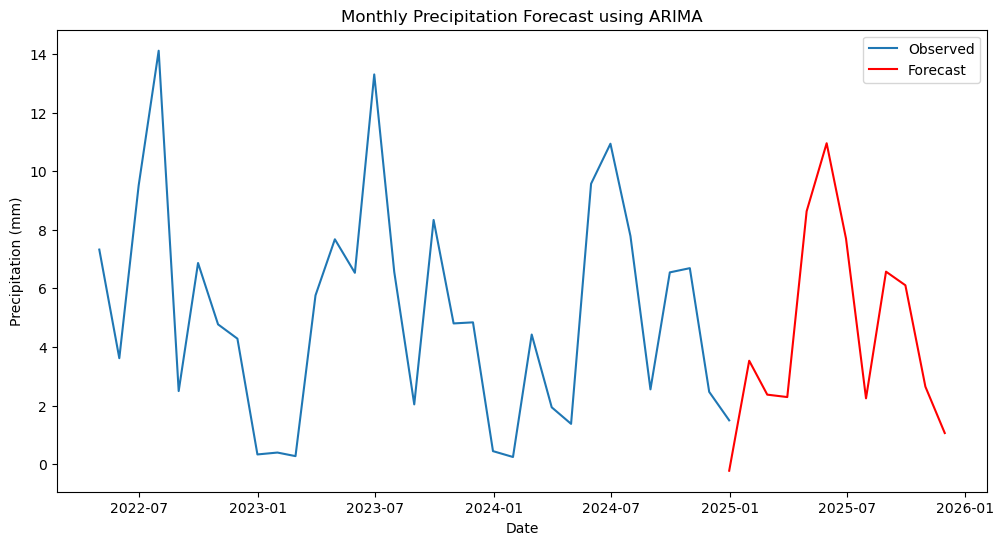

In [15]:
#  Plot observed and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df, label='Observed')
plt.plot(pd.date_range(start=monthly_df.index[-1], periods=forecast_steps, freq='M'), forecast.predicted_mean, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Monthly Precipitation Forecast using ARIMA')
plt.legend()
plt.show()

In [16]:
# Set the flood threshold
flood_threshold = 1.0
# Identify months with predicted precipitation above the threshold in the future forecast
forecast_future = forecast.predicted_mean
flood_months = forecast_future[forecast_future > flood_threshold]

print("Predicted flood months:")
print(flood_months)

Predicted flood months:
2025-02-28     3.528966
2025-03-31     2.371033
2025-04-30     2.288731
2025-05-31     8.634619
2025-06-30    10.956800
2025-07-31     7.699221
2025-08-31     2.245507
2025-09-30     6.571059
2025-10-31     6.106479
2025-11-30     2.643730
2025-12-31     1.060028
Freq: M, Name: predicted_mean, dtype: float64
